In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('C:\\Users\\Nat\\Downloads\\HR.csv')
df[:20]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [110]:
# найдем медиану
df.drop(['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary'], axis = 1).median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [104]:
# уберем категориальные столбцы
col_df = df.drop(['Work_accident', 'left', 'promotion_last_5years', 'department', 'salary'], axis = 1)
col_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [105]:
# корелляция по Пирсону
matrix_corr = col_df.corr()
matrix_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

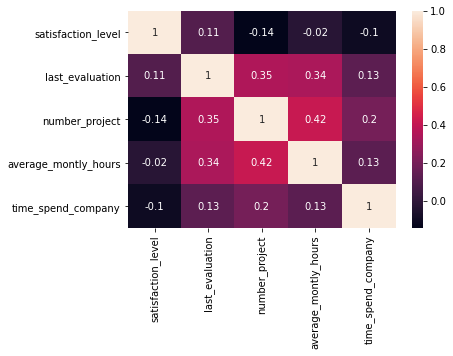

In [106]:
# визуализируем матрицу корелляции
sns.heatmap(col_df.corr(), annot=True)

In [ ]:
# найдем максимально и минимально скоррелированные данные

In [107]:
# количество сотрудников в каждом департаменте
df.department.value_counts().to_frame()

,department
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739
management,630


Text(0.5, 1.0, 'распределение  сотрудников по зарплатам')

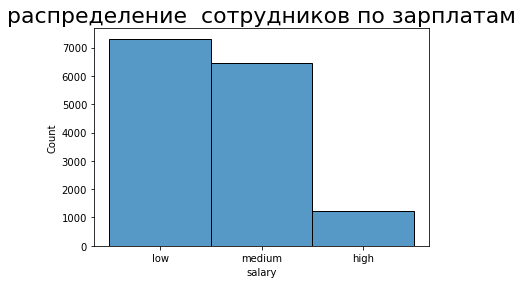

In [14]:
# распределение сотрудников по зарплатам
ax = sns.histplot(df.salary)
plt.title(f'распределение  сотрудников по зарплатам', fontsize=22)

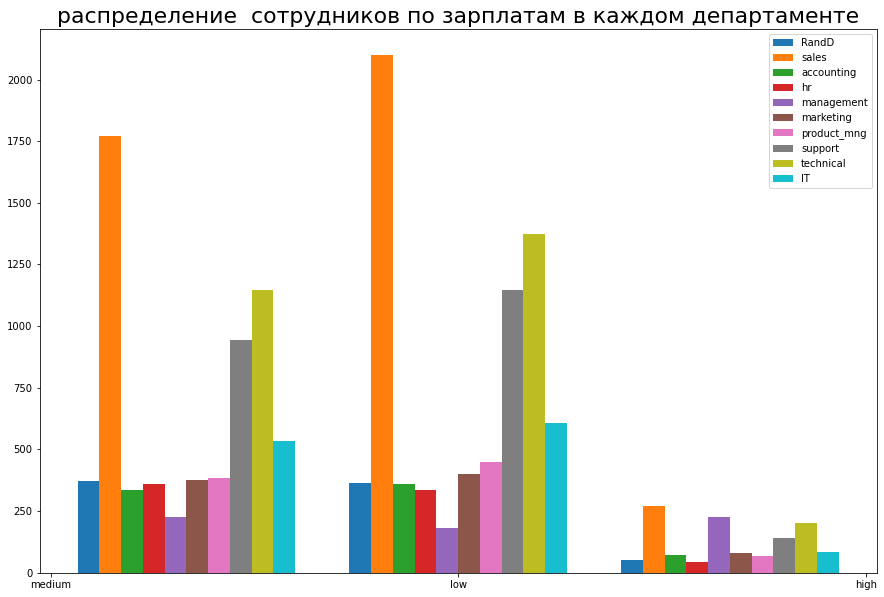

In [16]:
import numpy as np
import matplotlib.pyplot as plt

a = df[df['department'] == 'RandD']['salary']
b = df[df['department'] == 'sales']['salary']
c = df[df['department'] == 'accounting']['salary']
d = df[df['department'] == 'hr']['salary']
f = df[df['department'] == 'management']['salary']
g = df[df['department'] == 'marketing']['salary']
h = df[df['department'] == 'product_mng']['salary']
j = df[df['department'] == 'support']['salary']
k = df[df['department'] == 'technical']['salary']
l = df[df['department'] == 'IT']['salary']

bins = 3
plt.figure(figsize=(15,10))
plt.hist([a, b, c, d, f, g, h, j, k, l], bins, label=['RandD', 'sales', 'accounting', 'hr', 'management', 'marketing', 
                                                     'product_mng', 'support', 'technical', 'IT'])
plt.legend(loc='upper right')
plt.title(f'распределение  сотрудников по зарплатам в каждом департаменте', fontsize=22)
plt.show()

In [17]:
df.groupby(['department', 'salary'])['salary'].count()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом  

In [69]:
# посчитаем количество сотрудников с низким, средним и высоким окладом
df['salary'].value_counts().sort_index(ascending=False).sort_values(ascending=False)

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

<AxesSubplot:title={'center':'average_montly_hours'}, xlabel='salary'>

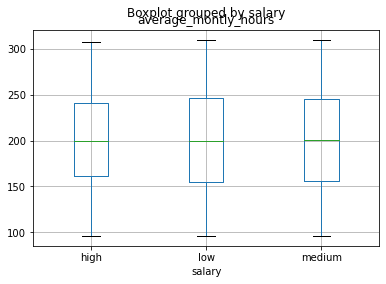

In [58]:
# посмотрим, нет ли выбросов по часам
df.boxplot(column = ['average_montly_hours'], by = 'salary')

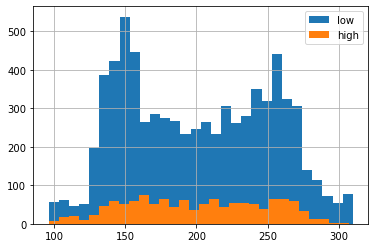

In [6]:
# построим гистограмму распределения  в зависимости от зарплаты
df[df['salary'] == 'low']['average_montly_hours'].hist(label = ['low'], bins = 30) #density=True
df[df['salary'] == 'high']['average_montly_hours'].hist(label = ['high'], bins = 30)
plt.legend(loc='upper right')
plt.title(f'', fontsize=44)
plt.show()

распределение не является нормальным, применим критерий Манна-Уитни

In [97]:
# сохраним в отдельные переменные выборки которые сравниваем
x = df[df['salary'] == 'low']['average_montly_hours']
y = df[df['salary'] == 'high']['average_montly_hours']
# применим критерий
res = stats.mannwhitneyu(x,y)
print('p-value:',res[1])


p-value: 0.4120665360429347


p-value получилось достаточно большим (уровень значимости 0.05), поэтому мы не можем отвергнуть нулевую гипотезу и сотрудник с высоким окладом НЕ проводит больше времени на работе. 

### Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов. Оценить качество модели на тестовой выборки.

In [81]:
data = df.drop(['department', 'salary'], axis = 1)
data_left = list(df.left)

In [82]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_left, test_size=0.25)

In [42]:
# проверим сколько значений остается для тестирования данных
len(y_test)

3750

In [83]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [84]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head()

,0,1
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [85]:
from sklearn.metrics import accuracy_score
# расчет точности модели
accuracy_score(y_test, lda.predict(X_test))

0.7624

Низкая точность LDA модели. Как ее оптимизировать или где-то ошибка? 

### Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):    
•	Доля сотрудников с повышением за последние 5 лет
•	Средняя степень удовлетворенности
•	Среднее количество проектов


In [93]:
# все кто уволися
left_1 = df[df['left'] == 1].count()[0]
# найдем тех, кто уволился с повышением
filtered_left_1 = df[(df['promotion_last_5years'] == 1)&(df['left'] == 1)]
x_1 = round(100*len(filtered_left_1)/left_1, 2)
print('для сотрудников, которые уволились:'.upper())
print('лишь', x_1, '% получили повышение')
filtered_mean = df[df['left'] == 1]
print('среднее по уровню удовлетворенности',filtered_mean['satisfaction_level'].mean())
print('среднее количество  проектов',filtered_mean['number_project'].mean())

ДЛЯ СОТРУДНИКОВ, КОТОРЫЕ УВОЛИЛИСЬ:
лишь 0.53 % получили повышение
среднее по уровню удовлетворенности 0.44009801176140917
среднее количество  проектов 3.8555026603192384


In [95]:
# все кто не уволился
left_0 = df[df['left'] == 0].count()[0]
# найдем тех, кто получил повышение
filtered_left_0 = df[(df['promotion_last_5years'] == 1)&(df['left'] == 0)]
x_0 = round(100*len(filtered_left_0)/left_0, 2)
print('для сотрудников, которые не уволились:'.upper())
print(x_0, '% получили повышение')
filtered_mean = df[df['left'] == 0]
print('среднее по уровню удовлетворенности',filtered_mean['satisfaction_level'].mean())
print('среднее количество  проектов',filtered_mean['number_project'].mean())

ДЛЯ СОТРУДНИКОВ, КОТОРЫЕ НЕ УВОЛИЛИСЬ:
2.63 % получили повышение
среднее по уровню удовлетворенности 0.666809590479516
среднее количество  проектов 3.786664333216661
